In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/reviews.csv
/kaggle/input/seattle/listings.csv


# Load Data

In [2]:
listings_df = pd.read_csv("/kaggle/input/seattle/listings.csv")
listings_df[:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
calender_df = pd.read_csv("/kaggle/input/seattle/calendar.csv")
calender_df[:5]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
reviews_df = pd.read_csv("/kaggle/input/seattle/reviews.csv")
reviews_df[:5]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Looking closer to the data

## Listings data

In [5]:
# Data type counts
listings_df.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [211]:
# Column names
list(listings_df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [6]:
# Float data type columns
listings_df.select_dtypes(include = ["float"])[:10]

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,3.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,6.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,2.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15
3,1.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0.89
5,1.0,1.0,47.630525,-122.366174,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.45
6,1.0,1.0,47.636605,-122.368519,1.0,1.0,1.0,NaN,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.46
7,5.0,5.0,47.640161,-122.375856,1.0,1.0,1.0,NaN,97.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.73
8,1.0,1.0,47.632410,-122.357216,1.0,1.0,1.0,NaN,97.0,10.0,9.0,10.0,9.0,10.0,10.0,NaN,1.22
9,6.0,6.0,47.637492,-122.366889,1.0,1.0,1.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,1.55


In [7]:
# Integer data type columns
listings_df.select_dtypes(include = ["int"])[:5]

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,241032,20160104002432,956883,4,2,1,365,14,41,71,346,207,2
1,953595,20160104002432,5177328,4,1,2,90,13,13,16,291,43,6
2,3308979,20160104002432,16708587,11,10,4,30,1,6,17,220,20,2
3,7421966,20160104002432,9851441,3,1,1,1125,0,0,0,143,0,1
4,278830,20160104002432,1452570,6,6,1,1125,30,60,90,365,38,1


In [8]:
# Object data type columns
listings_df.select_dtypes(include = ["object"])[:5]

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


In [9]:
# Object data type column names
list(listings_df.select_dtypes(include = ["object"]).columns.values)

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'require

Actually, some variables shoul be numeric. However, this data treat them as object data type. See what happend.

In [71]:
# NA counts
listings_df.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [73]:
# Which clumns have missig values ?
listings_df.isna().sum()[listings_df.isna().sum() > 0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

### Price

In [10]:
# Price cols
price_cols = [col for col in listings_df.columns if 'price' in col]
price_cols

['price', 'weekly_price', 'monthly_price']

In [11]:
# See the columns which contain 'price'
listings_df[price_cols][:5]

,price,weekly_price,monthly_price
0,$85.00,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00"
2,$975.00,NaN,NaN
3,$100.00,$650.00,"$2,300.00"
4,$450.00,NaN,NaN


Now we know that these columns contain a dollor sign before each number. Data proccesing will be required.

### Location

In [12]:
# Location related columns
listings_df[['city','state','zipcode','market','smart_location','country_code','country']].describe()

,city,state,zipcode,market,smart_location,country_code,country
count,3818,3818,3811,3818,3818,3818,3818
unique,7,2,28,1,7,1,1
top,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States
freq,3810,3817,420,3818,3810,3818,3818


As the data comes from the Airbnb Seatle, market, country_code and country are always unique values.

In [13]:
# See location variations grouped by 'state'
listings_df[['city','state','zipcode','smart_location']].groupby('state').count()

,city,zipcode,smart_location
state,,,
WA,3817,3810,3817
wa,1,1,1


Actually state variable is also unique.

In [14]:
# See location variations grouped by 'smart_location'
listings_df[['city','zipcode','smart_location']].groupby('smart_location').count()

,city,zipcode
smart_location,,
"Ballard, Seattle, WA",1,1
"Phinney Ridge Seattle, WA",1,1
"Seattle , WA",2,2
"Seattle, WA",3810,3803
"West Seattle, WA",2,2
"seattle, wa",1,1
"西雅图, WA",1,1


I googled 西雅图 on Google and it means Seatle. So, smart_location variable can be considered unique. 

In [15]:
# See location variations grouped by 'city'
listings_df[['city','zipcode']].groupby('city').count()

,zipcode
city,
"Ballard, Seattle",1
Phinney Ridge Seattle,1
Seattle,3803
Seattle,2
West Seattle,2
seattle,1
西雅图,1


Likewise, city varibale do not provide any information.

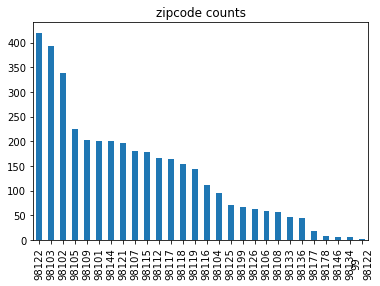

In [16]:
# Zipcode counts
listings_df['zipcode'].value_counts().plot(kind='bar', title = 'zipcode counts');

In [17]:
# Zipcode null counts
listings_df['zipcode'].isna().sum()

7

We can see clearly the tendency of zipcode. 

### Review

In [18]:
# Review related columns
review_cols = [col for col in listings_df.columns if 'review' in col]
listings_review_df = listings_df[review_cols]
listings_review_df

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89
...,...,...,...,...,...,...,...,...,...,...,...
3813,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0,0.30
3814,2,2015-12-18,2015-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.00
3815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# number_of_reviews
listings_review_df['number_of_reviews'].value_counts()

0      627
1      310
2      224
4      160
3      157
      ... 
244      1
270      1
278      1
294      1
353      1
Name: number_of_reviews, Length: 195, dtype: int64

Some rooms never have received a review. In this case, it is impossible to know the quiality of room or apartment.

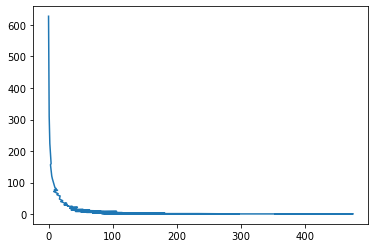

In [20]:
# Plot
listings_review_df['number_of_reviews'].value_counts().plot();

In [21]:
listings_review_df['number_of_reviews'].describe()

count    3818.000000
mean       22.223415
std        37.730892
min         0.000000
25%         2.000000
50%         9.000000
75%        26.000000
max       474.000000
Name: number_of_reviews, dtype: float64

We can see that only a small portion of the hosts has many reviews.

In [22]:
# Review euals 10 or less
np.sum(listings_review_df['number_of_reviews'] < 11)

2049

In [23]:
# Review euals 5 or less
np.sum(listings_review_df['number_of_reviews'] < 6)

1599

In [24]:
# Review euals 3 or less
np.sum(listings_review_df['number_of_reviews'] < 4)

1318

How one can clean the number of reviews column ?
As the revieew scores are the mean of reviews, they may be biased if there are few reviews.

### Price and related columns

In [25]:
listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$700.00,$125.00
...,...,...,...,...,...
3813,$359.00,NaN,NaN,NaN,$230.00
3814,$79.00,NaN,NaN,$500.00,$50.00
3815,$93.00,$450.00,NaN,$250.00,$35.00
3816,$99.00,NaN,NaN,$300.00,$45.00


Note that they are treated as not numeric. So it needs to be fixed.

#### Change data type

In [194]:
# Change data type
listings_price_df = listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

for col in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    listings_price_df = pd.concat([listings_price_df.drop(columns = [col]), listings_price_df[col].str.replace('$','').str.replace(',','').astype(float)], axis = 1)
    
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,NaN,NaN,NaN,NaN
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,NaN,NaN,1000.0,300.0
3,100.0,650.0,2300.0,NaN,NaN
4,450.0,NaN,NaN,700.0,125.0


In [195]:
# NA counts
listings_price_df.isna().sum()/listings_price_df.shape[0]

price               0.000000
weekly_price        0.473808
monthly_price       0.602672
security_deposit    0.511262
cleaning_fee        0.269775
dtype: float64

Many rooms and apartments are not offered a long term price.   
Aproximately a half of the data requires a depossit and about a 27% of them charges a cleaning fee.

In [196]:
# calculate weekly and monthly prices
listings_price_df['calc_weekly_price'] = listings_price_df['price'] * 7
listings_price_df['calc_monthly_price'] = listings_price_df['price'] * 30
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,NaN,NaN,NaN,NaN,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,NaN,NaN,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,NaN,NaN,700.0,3000.0
4,450.0,NaN,NaN,700.0,125.0,3150.0,13500.0


In [197]:
# Fill missing values as 0
listings_price_df.fillna(0, inplace = True)
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,0.0,0.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,0.0,0.0,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,0.0,0.0,700.0,3000.0
4,450.0,0.0,0.0,700.0,125.0,3150.0,13500.0


In [198]:
# loop
for idx, row in listings_price_df.iterrows():
    if row['weekly_price'] == 0:
        listings_price_df.loc[idx, ['weekly_price']] = row['calc_weekly_price']
    if row['monthly_price'] == 0:
        listings_price_df.loc[idx, ['monthly_price']] = row['calc_monthly_price']

listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,595.0,2550.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,6825.0,29250.0,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,0.0,0.0,700.0,3000.0
4,450.0,3150.0,13500.0,700.0,125.0,3150.0,13500.0


In [200]:
# Drop calc_weekly_price and calc_monthly_price columns
listings_price_df = listings_price_df.drop(columns = ['calc_weekly_price', 'calc_monthly_price'])

In [201]:
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,595.0,2550.0,0.0,0.0
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,6825.0,29250.0,1000.0,300.0
3,100.0,650.0,2300.0,0.0,0.0
4,450.0,3150.0,13500.0,700.0,125.0


#### security_deposit

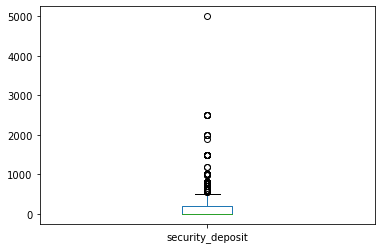

In [202]:
# security_deposit
listings_price_df['security_deposit'].plot(kind='box');

In [203]:
listings_price_df['security_deposit'].describe()

count    3818.000000
mean      140.566003
std       237.387534
min         0.000000
25%         0.000000
50%         0.000000
75%       200.000000
max      5000.000000
Name: security_deposit, dtype: float64

Maybe there are some very high values. 

#### Cleaning fee

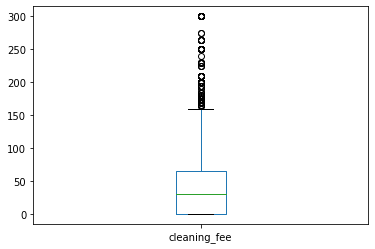

In [204]:
listings_price_df['cleaning_fee'].plot(kind='box');

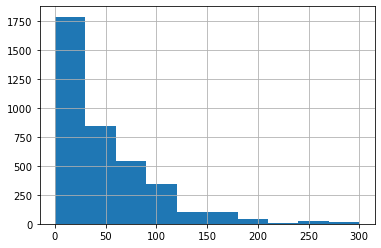

In [205]:
listings_price_df['cleaning_fee'].hist();

In [206]:
listings_price_df['cleaning_fee'].describe()

count    3818.000000
mean       45.062860
std        49.913798
min         0.000000
25%         0.000000
50%        30.000000
75%        65.000000
max       300.000000
Name: cleaning_fee, dtype: float64

It seems that the cleaning fee has a limit value which is $ 300. The variance is lower that deposit's one.

#### Correlation

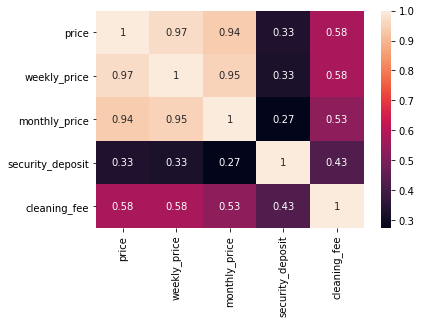

In [207]:
# Correlation
sns.heatmap(listings_price_df.corr(), annot = True);

Actuall price is price + cleaning fee

### Review scores

In [34]:
review_scores_cols = [col for col in listings_df.columns if 'review_scores' in col]
review_scores_df = listings_df[review_scores_cols]

# drop na rows
review_scores_df = review_scores_df.dropna()
review_scores_df.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,94.538949,9.636795,9.556048,9.786574,9.810956,9.608930,9.452185
std,6.597547,0.697614,0.797442,0.595663,0.559464,0.628746,0.750099
min,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Actually the means of review scores are high.

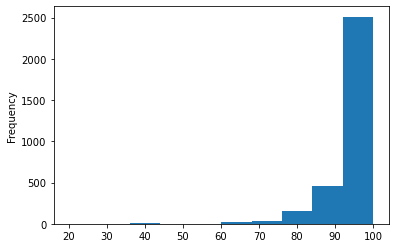

In [35]:
# review_scores_rating
review_scores_df['review_scores_rating'].plot(kind='hist');

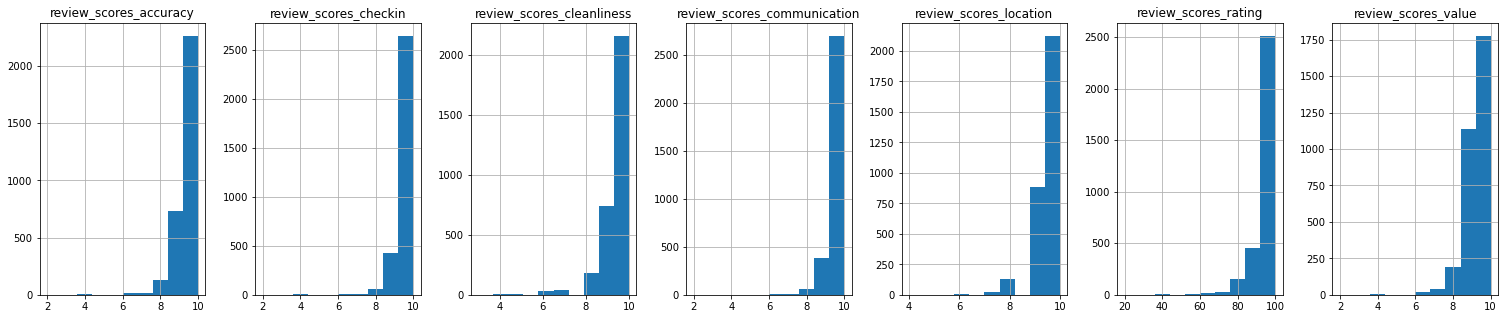

In [36]:
# Other scores
review_scores_df.hist(layout = [1,8], figsize = (30, 5), bins = 10);

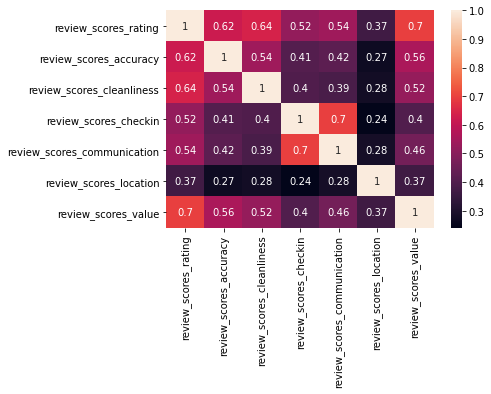

In [37]:
# Correlations
sns.heatmap(review_scores_df.corr(method ='pearson'), annot = True);

### Facilities (number of bathrooms, bedrooms, beds and accommodates)


In [215]:
facilities_df = listings_df[['bathrooms', 'bedrooms', 'beds', 'accommodates']]
facilities_df[:5]

,bathrooms,bedrooms,beds,accommodates
0,1.0,1.0,1.0,4
1,1.0,1.0,1.0,4
2,4.5,5.0,7.0,11
3,1.0,0.0,2.0,3
4,2.0,3.0,3.0,6


In [216]:
#Missing values
facilities_df.isna().sum()

bathrooms       16
bedrooms         6
beds             1
accommodates     0
dtype: int64

In [217]:
facilities_df[facilities_df.isna().any(axis=1)]

,bathrooms,bedrooms,beds,accommodates
1242,NaN,1.0,2.0,4
1314,NaN,1.0,2.0,4
1357,NaN,2.0,3.0,6
1378,NaN,1.0,1.0,4
1429,1.0,NaN,1.0,2
1492,1.0,NaN,1.0,6
1493,1.0,NaN,2.0,4
1853,1.0,NaN,1.0,2
1961,NaN,1.0,NaN,4
1975,NaN,1.0,1.0,1


The number of bedrooms should be at least one when there is beds. In some cases, bathrooms are not available.

#### Accomodates

In [224]:
listings_df['accommodates'].value_counts().sort_index()

1      256
2     1627
3      398
4      785
5      184
6      332
7       52
8      119
9       13
10      25
11       3
12      15
14       3
15       2
16       4
Name: accommodates, dtype: int64

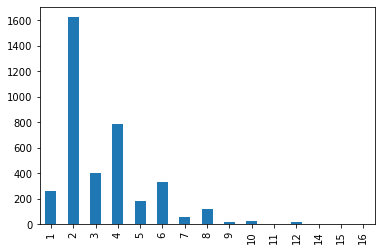

In [225]:
listings_df['accommodates'].value_counts().sort_index().plot(kind='bar');

### Facilities (type)

In [214]:
listings_df[['property_type','room_type','bed_type','amenities']][:5]

,property_type,room_type,bed_type,accommodates,amenities
0,Apartment,Entire home/apt,Real Bed,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,Apartment,Entire home/apt,Real Bed,4,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,House,Entire home/apt,Real Bed,11,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Apartment,Entire home/apt,Real Bed,3,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,House,Entire home/apt,Real Bed,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [226]:
# NA counts
listings_df[['property_type','room_type','bed_type','amenities']].isna().sum()

property_type    1
room_type        0
bed_type         0
amenities        0
dtype: int64

In [234]:
# Na rows
(listings_df[['property_type','room_type','bed_type','amenities']])[listings_df[['property_type','room_type','bed_type','amenities']].isna().any(axis=1)]

,property_type,room_type,bed_type,amenities
2184,NaN,Entire home/apt,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ..."


In [85]:
listings_df['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [86]:
listings_df['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [87]:
listings_df['bed_type'].value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

### Amenities

In [161]:
# amenities
amenities_df = listings_df['amenities']
amenities_df[:5]

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [162]:
amenities_df.value_counts()

{}                                                                                                                                                                                                                                                                                                                                  45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                              11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}                                10
{TV,"Cable TV",Inte

There are 45 rows where the amenities are empty. Drop these rows.

In [167]:
amenities_df = amenities_df[amenities_df != '{}']

In [169]:
amenities_list = []

for index, row in amenities_df.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

amenities_list[:3]


[['TV',
  'Cable TV',
  'Internet',
  'Wireless Internet',
  'Air Conditioning',
  'Kitchen',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer'],
 ['TV',
  'Internet',
  'Wireless Internet',
  'Kitchen',
  'Free Parking on Premises',
  'Buzzer/Wireless Intercom',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer',
  'Smoke Detector',
  'Carbon Monoxide Detector',
  'First Aid Kit',
  'Safety Card',
  'Fire Extinguisher',
  'Essentials'],
 ['TV',
  'Cable TV',
  'Internet',
  'Wireless Internet',
  'Air Conditioning',
  'Kitchen',
  'Free Parking on Premises',
  'Pets Allowed',
  'Pets live on this property',
  'Dog(s)',
  'Cat(s)',
  'Hot Tub',
  'Indoor Fireplace',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer',
  'Smoke Detector',
  'Carbon Monoxide Detector',
  'Essentials',
  'Shampoo']]

As each entry is a list, we need to somehow arrage this variable. One approch could be the one-hot encoding.

In [171]:
# Create a new ammenities df
new_amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()
new_amenities_df

,amenities
0,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
1,"[TV, Internet, Wireless Internet, Kitchen, Fre..."
2,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
3,"[Internet, Wireless Internet, Kitchen, Indoor ..."
4,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
...,...
3768,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
3769,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
3770,"[Cable TV, Wireless Internet, Kitchen, Free Pa..."
3771,"[TV, Wireless Internet, Kitchen, Free Parking ..."


In [172]:
# Modified the code from https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

dummies_amenities_df = new_amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(new_amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

dummies_amenities_df

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,1
3769,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
3770,0,0,1,0,1,0,1,1,0,1,...,1,0,1,0,0,0,1,0,0,1
3771,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [178]:
dummies_amenities_df.columns.values

array(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet',
       'Iron', 'Kitchen', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet'], dtype=object)

### Policies(cancellation_policy,require_guest_profile_picture and require_guest_phone_verification)

In [241]:
policies_df = listings_df[['cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']]

policies_df[:5]

,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,moderate,f,f
1,strict,t,t
2,strict,f,f
3,flexible,f,f
4,strict,f,f


In [242]:
# cancellation policy

policies_df['cancellation_policy'].value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [243]:
policies_df['require_guest_profile_picture'].value_counts()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [244]:
policies_df['require_guest_phone_verification'].value_counts()

f    3443
t     375
Name: require_guest_phone_verification, dtype: int64

In [248]:
# cancellation_policy dummy df
pd.get_dummies(policies_df['cancellation_policy'], prefix='cancellation_policy')[:5]

,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


## Calender data

In [38]:
# See first 5 rows
calender_df[:5]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [39]:
# data types
calender_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

Some data formats seem to be incorrect.

In [40]:
# Null counts

calender_df.isna().sum()/calender_df.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [41]:
# available variable counts

calender_df['available'].value_counts()/calender_df.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

The proportion of f is matched with null of price variable. This means that when a room or apartment is unavailable, the price is not registered.   


In [42]:
# listing_id counts
calender_df['listing_id'].value_counts()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
           ... 
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length: 3818, dtype: int64

In [43]:
# Unique listing_id
calender_df['listing_id'].value_counts().shape[0]

3818

Some conclusions

* There are 3818 room or apartment price data for 365 days. 

This flat horzontal means that all the dates apper equally in this data set.

In [44]:
# Number of date unique values
calender_df['date'].value_counts().shape[0]

365

Then we can order date variable to see tendencies in month, weekdays, etc. 

In [45]:
# Date variable counts
calender_df['price'].value_counts()

$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
           ...  
$560.00        1
$751.00        1
$623.00        1
$784.00        1
$625.00        1
Name: price, Length: 669, dtype: int64

As the price column has many missing value, we need to see how to impute it. Besides, it needs to be changed the data type as the price variable should be countinuous. 

# Prepropessing

## Listings

* Select only the columns which we are interested in
* Drop rows with missing values of the number of reviews
* Drop rows with missing values of the bathrooms
* Drop rows with missing values of the property type
* Drop rows where the number of reviews is 0.
* Drop rows where the amenities are empty
* Fill missing values of the bedrooms and beds as 1
* Change the data type of the price and related columns and fill missing values as 0
* Calculate weekly and monthly prices if they are not available
* Create dummy columns of cancellation policy, room type, property type and bed type
* Create dummy columns based on the ammenities


### Select only the columns which we are interested in

In [249]:
#Select only the columns which we are interested in

selected_listings_cols = [
    'id',
#  'listing_url',
#  'scrape_id',
#  'last_scraped',
#  'name',
#  'summary',
#  'space',
#  'description',
#  'experiences_offered',
#  'neighborhood_overview',
#  'notes',
#  'transit',
#  'thumbnail_url',
#  'medium_url',
#  'picture_url',
#  'xl_picture_url',
#  'host_id',
#  'host_url',
#  'host_name',
#  'host_since',
#  'host_location',
#  'host_about',
#  'host_response_time',
#  'host_response_rate',
#  'host_acceptance_rate',
#  'host_is_superhost',
#  'host_thumbnail_url',
#  'host_picture_url',
#  'host_neighbourhood',
#  'host_listings_count',
#  'host_total_listings_count',
#  'host_verifications',
#  'host_has_profile_pic',
#  'host_identity_verified',
#  'street',
#  'neighbourhood',
#  'neighbourhood_cleansed',
#  'neighbourhood_group_cleansed',
#  'city',
#  'state',
#  'zipcode',
#  'market',
#  'smart_location',
#  'country_code',
#  'country',
#  'latitude',
#  'longitude',
#  'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
#  'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
#  'guests_included',
#  'extra_people',
#  'minimum_nights',
#  'maximum_nights',
#  'calendar_updated',
#  'has_availability',
#  'availability_30',
#  'availability_60',
#  'availability_90',
#  'availability_365',
#  'calendar_last_scraped',
 'number_of_reviews',
#  'first_review',
#  'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
#  'requires_license',
#  'license',
#  'jurisdiction_names',
#  'instant_bookable',
 'cancellation_policy',
#  'require_guest_profile_picture',
#  'require_guest_phone_verification',
#  'calculated_host_listings_count',
#  'reviews_per_month'
]

new_listings_df = listings_df[selected_listings_cols]
new_listings_df[:5]

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,...,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,...,NaN,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,...,$40.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,...,$300.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,...,$125.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict


### Drop unnecesary columns

In [251]:
# Drop rows with missing values of the number of reviews
# Drop rows with missing values of the bathrooms
# Drop rows with missing values of the property type

new_listings_df.dropna(subset = ['number_of_reviews','bathrooms','property_type'], axis = 0, inplace = True)

# Drop rows where the number of reviews is 0.
new_listings_df = new_listings_df[new_listings_df['number_of_reviews'] != 0]

# Drop rows where the amenities are empty
new_listings_df = new_listings_df[new_listings_df['amenities'] != '{}']

new_listings_df[:5]

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,...,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,...,NaN,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,...,$40.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,...,$300.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,...,$125.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict
5,5956968,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",$120.00,...,$40.00,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict


### Fill missing values

In [ ]:
# Fill missing values of the bedrooms and beds as 1
new_listings_df[['bedrooms', 'beds']] = new_listings_df[['a','b']].fillna(value = 1)

# Change the data type of the price and related columns and fill missing values as 0
new_listings_df[['bedrooms', 'beds']] = new_listings_df[['a','b']].fillna(value = 1)


## Calender

* Change date variable as date format
* Chnage price variable as float type



In [46]:
# Copy the original data set
new_calender_df = calender_df.copy()
new_calender_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [47]:
# Change data types
new_calender_df['date'] = pd.to_datetime(new_calender_df['date']) 
new_calender_df['price'] = new_calender_df['price'].str.replace('$','').str.replace(',','').astype(float)
new_calender_df['available'] = new_calender_df['available'].replace({'t': True, 'f': False})
new_calender_df

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,False,NaN
1393566,10208623,2016-12-30,False,NaN
1393567,10208623,2016-12-31,False,NaN
1393568,10208623,2017-01-01,False,NaN


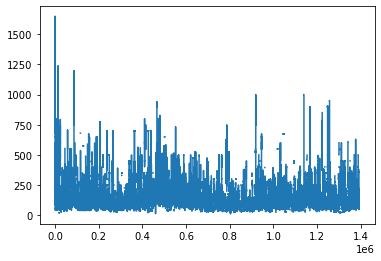

In [48]:
# Plot price data
new_calender_df['price'].plot();

This plot is actually not meaningful.

In [49]:
# Na counts by id
new_calender_df.groupby('listing_id')['available'].sum()

listing_id
3335        309.0
4291        365.0
5682        309.0
6606        365.0
7369         53.0
            ...  
10332096    365.0
10334184    361.0
10339144      0.0
10339145    365.0
10340165    358.0
Name: available, Length: 3818, dtype: float64

In [50]:
# How many rooms or apartments are never available ?
np.sum(new_calender_df.groupby('listing_id')['available'].sum() == 0)

95

These rows should be deleted as they never provide the price information. 

In [51]:
# Filter out never available listing_id
listing_id_available_count = new_calender_df.groupby('listing_id')['available'].sum().loc[lambda x : x != 0]

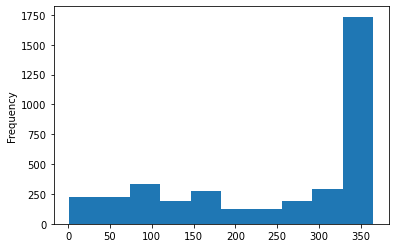

In [52]:
listing_id_available_count.plot(kind='hist');

In [53]:
# Number of always available listing_id
listing_id_available_count[listing_id_available_count == 365].count()

678

We can see that most of rooms and apartmants are available for the entire periods of the data

Data cleaning

* Delete rows of listing_id which never provide the price information
* Create columns of year, month and day


In [54]:
# Create a list which contains always non available listing_id
always_f_listing_id = list(new_calender_df.groupby('listing_id')['available'].sum().loc[lambda x : x == 0].index.values)

In [55]:
# Drop these rows
clean_calender_df = new_calender_df[~new_calender_df['listing_id'].isin(always_f_listing_id)]
np.sum(clean_calender_df.groupby('listing_id')['available'].sum() == 0)

0

In [56]:
# Create new columns
clean_calender_df['day'] = clean_calender_df['date'].dt.day
clean_calender_df['month'] = clean_calender_df['date'].dt.month
clean_calender_df['year'] = clean_calender_df['date'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [57]:
# Take a look at the cleaned data
clean_calender_df[:5]

,listing_id,date,available,price,day,month,year
0,241032,2016-01-04,True,85.0,4,1,2016
1,241032,2016-01-05,True,85.0,5,1,2016
2,241032,2016-01-06,False,NaN,6,1,2016
3,241032,2016-01-07,False,NaN,7,1,2016
4,241032,2016-01-08,False,NaN,8,1,2016
